### Continuous Probability Distributions

**Objectives**:

- Use uniform and normal distributions
- Use scaling to express data in standard form
- Use key properties of normal distribution
- Experiment with sample means and their distribution

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats

### Continuous Distributions

Now, rather than discussing discrete distributions the topic shifts to distributions of *continuous random variables*.  This simply means the objects we are working with are on continuous scales -- weight, height, speed, etc.

### Uniform Distribution

*The distribution describes an experiment where there is an arbitrary outcome that lies between certain bounds* -- [Wikipedia](https://en.wikipedia.org/wiki/Continuous_uniform_distribution)

$$\text{PDF} = \begin{cases} \frac{1}{b-a} & x \in [a, b] \\ 0 & \text{otherwise}\end{cases}$$

In [2]:
#define the uniform distribution
uniform_dist = stats.uniform()

In [3]:
#define a domain of values
x = np.linspace(-1, 2, 1000)

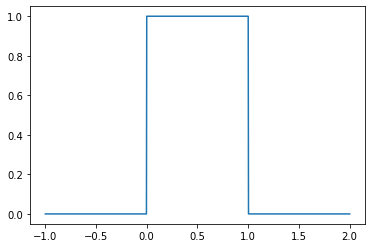

In [4]:
#look at a plot
plt.plot(x, uniform_dist.pdf(x))

In [5]:
#probability of .5?
uniform_dist.pdf(0.5)

1.0

In [6]:
#probabiity of .3 or fewer?
uniform_dist.cdf(.3)

0.3

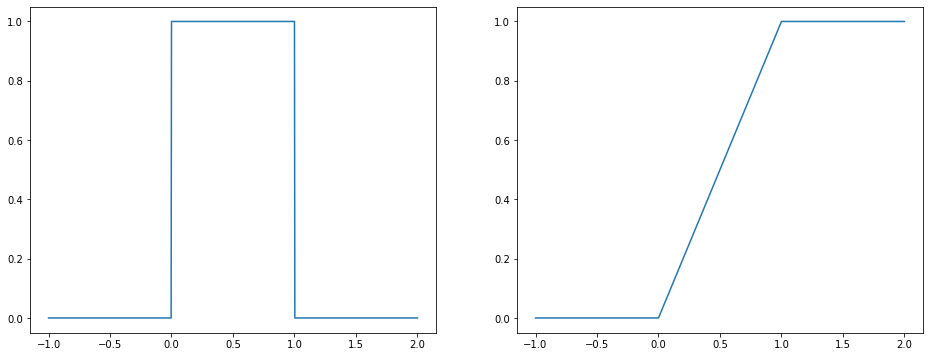

In [7]:
#side by side plot of pdf and cdf
fig, ax = plt.subplots(1, 2, figsize = (16, 6))
ax[0].plot(x, uniform_dist.pdf(x))
ax[1].plot(x, uniform_dist.cdf(x))

### The Normal Distribution


*Normal distributions are important in statistics and are often used in the natural and social sciences to represent real-valued random variables whose distributions are not known.* -- [Wikipedia](https://en.wikipedia.org/wiki/Normal_distribution)


$${\displaystyle f(x)={\frac {1}{\sigma {\sqrt {2\pi }}}}e^{-{\frac {1}{2}}\left({\frac {x-\mu }{\sigma }}\right)^{2}}}$$

In [8]:
#mean of 100 sd of 3
norm_1 = stats.norm(loc = 100, scale = 3)

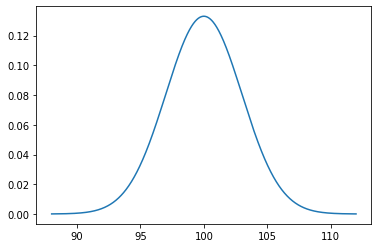

In [9]:
#plot pdf
x = np.linspace(88, 112, 1000)
plt.plot(x, norm_1.pdf(x))

In [10]:
#how much between 97 and 103?
norm_1.cdf(103) - norm_1.cdf(97)

0.6826894921370859

In [11]:
#how much data between 94 and 106?
norm_1.cdf(106) - norm_1.cdf(94)

0.9544997361036416

In [12]:
#between 91 and 109?
norm_1.cdf(109) - norm_1.cdf(91)

0.9973002039367398

### Parameters of Normal

In [2]:
import ipywidgets as widgets
from ipywidgets import interact

In [3]:
#function that takes in mean and standard deviation, returns plot of pdf
def plot_pdt(mean_num, std_num):
    norm_1 = stats.norm(loc = mean_num, scale = std_num)
    x = np.linspace(mean_num - std_num * 4, mean_num + std_num * 4, 1000)
    plt.plot(x, norm_1.pdf(x))
    plt.xlim(80, 120)

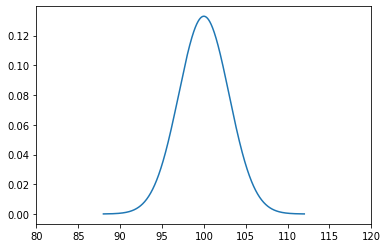

In [4]:
#plot pdf
plot_pdt(100, 3)

In [5]:
#interact with it
interact(plot_pdt, mean_num = widgets.FloatSlider(min = 50, max = 150, step = 1, description = 'Mean'),
                    std_num = widgets.FloatSlider(min = 0.1, max = 20, step = 0.1, description = 'σ'))

interactive(children=(FloatSlider(value=50.0, description='Mean', max=150.0, min=50.0, step=1.0), FloatSlider(…

<function __main__.plot_pdt(mean_num, std_num)>

### Standardization

Suppose we have two distributions on different domains from which we would like to compare scores.  
- An English Class has test scores normally distributed with mean 95 and standard deviation 5.

- A Mathematics Class has test scores normally distributed with mean 80 and standard deviation 7.

In [17]:
#math class
math_class = stats.norm(loc = 80, scale = 7)

(array([ 6.,  6., 13., 14., 14., 22.,  9.,  9.,  6.,  1.]),
 array([67.25699939, 70.08784809, 72.91869679, 75.74954549, 78.58039419,
        81.41124289, 84.24209159, 87.07294029, 89.90378899, 92.73463769,
        95.56548639]),
 <BarContainer object of 10 artists>)

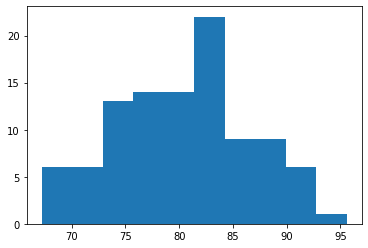

In [18]:
#histogram
plt.hist(math_class.rvs(100))

In [19]:
#english scores
english_class = stats.norm(loc = 95, scale = 5)

In [20]:
#make a dataframe
tests_df = pd.DataFrame({'math': math_class.rvs(1000), 'english': english_class.rvs(1000)})
tests_df.head()

,math,english
0,79.840547,93.032962
1,78.963234,98.358824
2,74.705197,93.845099
3,81.209818,91.875296
4,85.291358,97.042743


(array([  2.,  11.,  45., 143., 260., 233., 177.,  92.,  26.,  11.]),
 array([ 78.26295882,  81.49345844,  84.72395806,  87.95445768,
         91.1849573 ,  94.41545692,  97.64595654, 100.87645616,
        104.10695578, 107.33745541, 110.56795503]),
 <BarContainer object of 10 artists>)

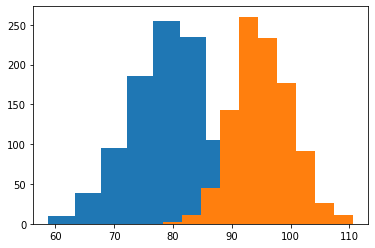

In [21]:
#plot the histograms together
plt.hist(tests_df['math'])
plt.hist(tests_df['english'])

In [ ]:
#problem: Student A -- 82 in math How many std's away from the mean is 82???
#.        Student B -- 97 in English
#Who did better?


**PROBLEMS**

1. The final exam scores in a statistics class were normally distributed with a mean of 63 and a standard deviation of five.
 - Find the probability that a randomly selected student scored more than 65 on the exam.
 - Find the probability that a randomly selected student scored less than 85.
 
2. The National Assessment of Educational Progress is a test that examines student performance in most states.  The NAEP 
reading scores assume a normal distribution $N(288, 38)$.  What range of scores encompasses 95% of the student data?

3. SAT and ACT examinations.  The SAT ranges from 600 to 2400; scores are normally distributed with mean = 1498 and standard deviation 316. The ACT ranges from 1 to 36 with mean 21.5 and standard deviation 5.4.  

- Two students received the following scores, who did better?
  - SAT: 1500
  - ACT: 23
- What is the equivalent score on the ACT to and SAT score of 2090?
  
